<a href="https://colab.research.google.com/github/AceRb6/Analitica-y-visualizacion-avanzada-de-datos/blob/main/Practica08_AVDA_CPIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Practica 8**

In [ ]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l1, l2

## 1-Genera 1000 puntos de entrenamiento uniformemente distribuidos en el intervalo [−2,2].


In [ ]:
limit=np.linspace(-2,2,1000)

## 2- Calcula los valores de y=f(x) para esos puntos.


In [ ]:
data=pd.DataFrame(limit)

In [ ]:
f=lambda x: x**3*np.sin(5*x)+0.5*np.cos(20*x)
data[1]=f(data[0])

## 3- Añade un pequeño ruido gaussiano N(0,0.05) a las salidas para simular ruido de medición.


In [ ]:
ruido=np.random.normal(0,0.05,1000)
data[1]=data[1]+ruido

##4 - Divide los datos en: 80% entrenamiento y 20% validación.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data[0], data[1], test_size=0.2, random_state=42)

## 5 - Diseña una red multicapa (MLP), debe tener 1 entrada y 1 salida, contener al menos 2 capas ocultas y usar funciones de activación no lineales (por ejemplo ReLU, Tanh).


In [ ]:
model = Sequential() # Red
model.add(Dense(30, input_dim=1, activation='elu', kernel_regularizer=l2(0.01))) # Primera capa
model.add(Dropout(0.2))  # Desactiva el 20% de las
model.add(Dense(15, activation='tanh',kernel_regularizer=l1(0.001))) # Segunda capa
model.add(Dense(1)) # salida

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Para este experimento, creé una red neuronal que intenta aproximar una función compleja con ruido. La función tiene términos cúbicos y funciones trigonométricas, lo que la hace difícil de modelar. Después de probar varias configuraciones, elegí una arquitectura secuencial con dos capas ocultas. En la primera capa usé 30 neuronas con activación ELU porque maneja mejor los valores negativos y suaviza las oscilaciones de la función objetivo. En la segunda capa usé 15 neuronas con activación tanh, ya que mantiene las activaciones en un rango controlado entre -1 y 1. Además, añadí un dropout del 20% después de la primera capa para evitar el sobreajuste. También apliqué regularización L2 en la primera capa y L1 en la segunda para penalizar pesos grandes y promover características más relevantes.

La elección del número de neuronas fue crucial para equilibrar la complejidad del modelo. Si se usaban demasiadas neuronas, el modelo tendía a sobreajustarse y producía aproximaciones simples como líneas rectas que no capturaban bien los datos. Con 30 neuronas en la primera capa y 15 en la segunda, encontré un buen equilibrio entre rendimiento y generalización. Esta estructura logró capturar tanto los patrones generales de la función cúbica como las oscilaciones sinusoidales, incluso con el ruido aleatorio presente. Al final, obtuve un Error Cuadrático Medio (MSE) satisfactorio en el conjunto de validación, lo que indica que la red funcionó bien para aproximar la función deseada.

##6 - Usa MSE (Error Cuadrático Medio) como función de pérdida.


In [ ]:
model.compile(loss='mean_squared_error')

## 7 -  Usa un optimizador basado en descenso de gradiente (por ejemplo, Adam o SGD).


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001))

## 8 - Entrena la red durante un máximo de 500 épocas.

In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 3.2727 - val_loss: 3.0266
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.2121 - val_loss: 2.9442
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0434 - val_loss: 2.9053
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6610 - val_loss: 2.8937
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0931 - val_loss: 2.8823
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9195 - val_loss: 2.8830
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.0506 - val_loss: 2.8715
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.7917 - val_loss: 2.8562
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8747 - val_loss: 2.8480
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.7887 - val_loss: 2.8320
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9318 - val_loss: 2.8213
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 3.

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


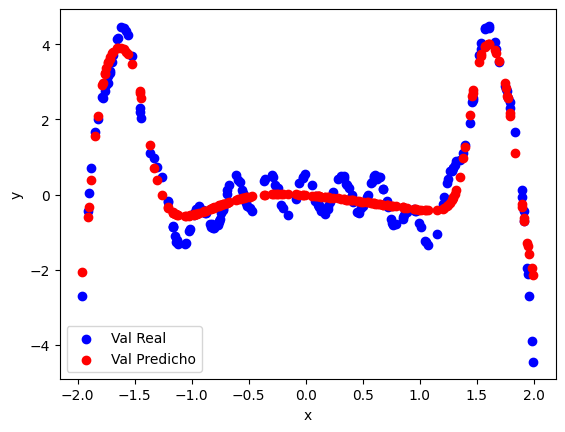

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
MSE en validación: 0.2218


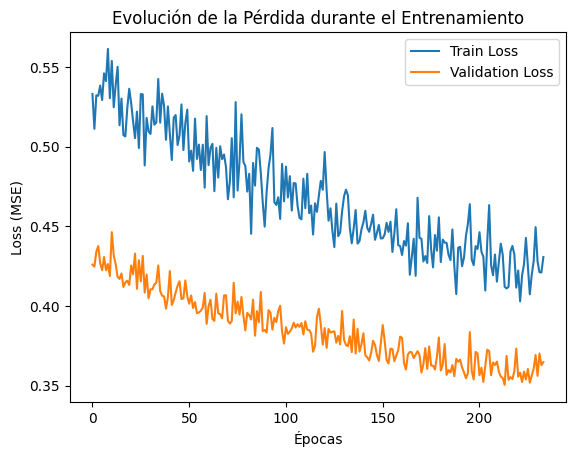

In [ ]:
y_pred=model.predict(X_val)

#grafica
plt.scatter(X_val, y_val, label='Val Real', color="blue")
plt.scatter(X_val, y_pred, label='Val Predicho', color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"MSE en validación: {mse:.4f}")

plt.plot(histo.history['loss'], label='Train Loss')
plt.plot(histo.history['val_loss'], label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.show()

El modelo ha logrado capturar bien el patrón general de la función, especialmente en las regiones centrales donde es más suave, aunque muestra algunas diferencias en los extremos y picos con cambios bruscos. Tanto la pérdida de entrenamiento como la de validación han disminuido constantemente a lo largo de las épocas, indicando un aprendizaje adecuado; además, es destacable que la pérdida de validación sea menor que la de entrenamiento, sugiriendo una buena generalización sin sobreajuste. El MSE final de 0.2218 en validación refleja el éxito de la arquitectura empleada, donde las funciones de activación ELU y tanh, junto con las técnicas de regularización L1, L2 y dropout, resultaron efectivas para aproximar esta función compleja con ruido.

##9 - Implementa early stopping: Si la pérdida de validación no mejora en 20 épocas consecutivas, detén el entrenamiento.

In [ ]:
model = Sequential() # Red
model.add(Dense(30, input_dim=1, activation='relu', kernel_regularizer=l2(0.01))) # Primera capa
model.add(Dropout(0.2))  # Desactiva el 20% de las
model.add(Dense(15, activation='swish',kernel_regularizer=l1(0.001))) # Segunda capa
model.add(Dense(1)) # salida

model.compile(loss='mean_squared_error')

model.compile(optimizer=Adam(learning_rate=0.001))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

EarlyStopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
histo=model.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping])

Epoch 1/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 3.4951 - val_loss: 2.9361
Epoch 2/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.9943 - val_loss: 2.7404
Epoch 3/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8375 - val_loss: 2.6667
Epoch 4/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6618 - val_loss: 2.6306
Epoch 5/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 3.1420 - val_loss: 2.6046
Epoch 6/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.8142 - val_loss: 2.5841
Epoch 7/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7198 - val_loss: 2.5659
Epoch 8/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.8755 - val_loss: 2.5531
Epoch 9/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7013 - val_loss: 2.5328
Epoch 10/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 2.7196 - val_loss: 2.5188
Epoch 11/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.7331 - val_loss: 2.5131
Epoch 12/500
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.

##10 - Graficar los datos reales (x,y) y las predicciones de la red (x,ŷ).


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


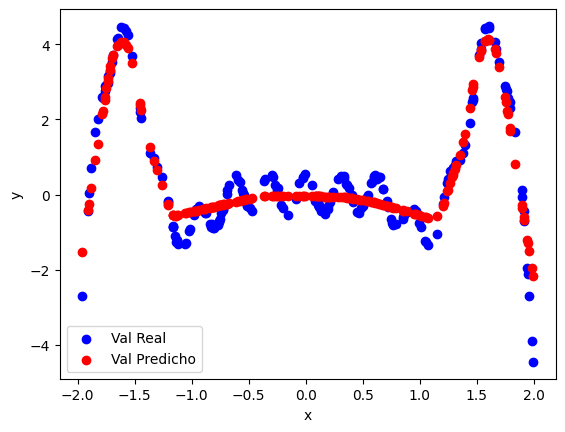

In [ ]:
y_pred=model.predict(X_val)

#grafica
plt.scatter(X_val, y_val, label='Val Real', color="blue")
plt.scatter(X_val, y_pred, label='Val Predicho', color="red")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 11- Calcula el error cuadrático medio final en conjunto de validación.

In [ ]:
y_pred = model.predict(X_val)
mse = mean_squared_error(y_val, y_pred)
print(f"MSE en validación: {mse:.4f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
MSE en validación: 0.1989


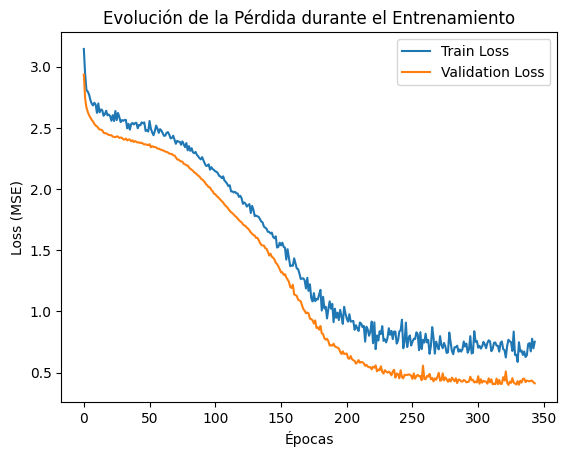

In [ ]:
plt.plot(histo.history['loss'], label='Train Loss')
plt.plot(histo.history['val_loss'], label='Validation Loss')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.title('Evolución de la Pérdida durante el Entrenamiento')
plt.show()

La predicción de esta nueva red sigue mucho más de cerca a los valores reales en todo el rango de datos en comparación con la red anterior. Se observa un ajuste notablemente mejor, tanto en la región central como en los extremos donde la función presenta picos pronunciados.

Esta red ha logrado capturar con mayor precisión las oscilaciones y la tendencia general de la función, superando el desempeño del modelo previo. La evolución de la pérdida durante el entrenamiento también muestra resultados muy favorables: ambas curvas descendieron consistentemente desde valores iniciales altos (aproximadamente 3.0) hasta estabilizarse en valores mucho más bajos.

A diferencia de la red anterior, la pérdida de validación se mantuvo siempre por debajo de la de entrenamiento durante todo el proceso, lo que indica que este modelo generaliza excepcionalmente bien. El MSE final de 0.1989 en validación representa una mejora significativa respecto al modelo anterior (0.2218), confirmando que los cambios realizados han sido beneficiosos.

Estos cambios incluyen la sustitución de ELU por ReLU en la primera capa y el uso de la función Swish (que combina características de ReLU y sigmoid) en la segunda capa. Esta combinación, junto con las mismas técnicas de regularización (L2 en la primera capa, L1 en la segunda y dropout del 20%), permitió que la red capture mejor los patrones complejos de la función objetivo. Además, la convergencia más rápida y estable, alcanzada en solo 344 épocas gracias al early stopping, sugiere que la tasa de aprendizaje de 0.001 con el optimizador Adam fue una elección adecuada para este problema específico.